In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("datasets/optdigits_raw.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [3]:
df.columns = ["P"+str(i) for i in range(0,len(df.columns)-1)] +["y"]
#no 1, 3, 6 will be use here
df =df.loc[df.y.isin([1,3,6])] 
df.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
11,0,0,0,3,16,11,1,0,0,0,...,0,0,0,0,2,14,14,1,0,1
14,0,0,7,11,11,6,0,0,0,9,...,0,0,0,14,16,12,10,1,0,3
24,0,0,9,13,1,0,0,0,0,0,...,5,0,0,4,15,16,16,16,16,1
27,0,0,0,10,12,0,0,0,0,0,...,0,0,0,1,11,14,12,1,0,6


In [4]:
#y colum cantains 10 type classes from 0-9 diggits
X = df.drop("y",axis=1)
y= df.y

X_train,X_test,y_train,y_test =  train_test_split(X,y, test_size = 0.3, random_state =1)

In [5]:
#creating two df for the upcoming models [train , test]
trn = X_train
trn["y"] = y_train

tst = X_test
tst["y"] = y_test

<ipython-input-5-9fe67bac7667>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trn["y"] = y_train
<ipython-input-5-9fe67bac7667>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tst["y"] = y_test


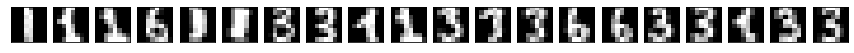

In [6]:
fig,ax = plt.subplots( 
                    nrows=1 ,
                    ncols = 20,
                    figsize=(15,3.5),
                    subplot_kw= dict(xticks= [],yticks=[]))
for i in  np.arange(20):
    ax[i].imshow(X_train.to_numpy()[i,0:-1].reshape(8,8), cmap = plt.cm.gray)

plt.show()


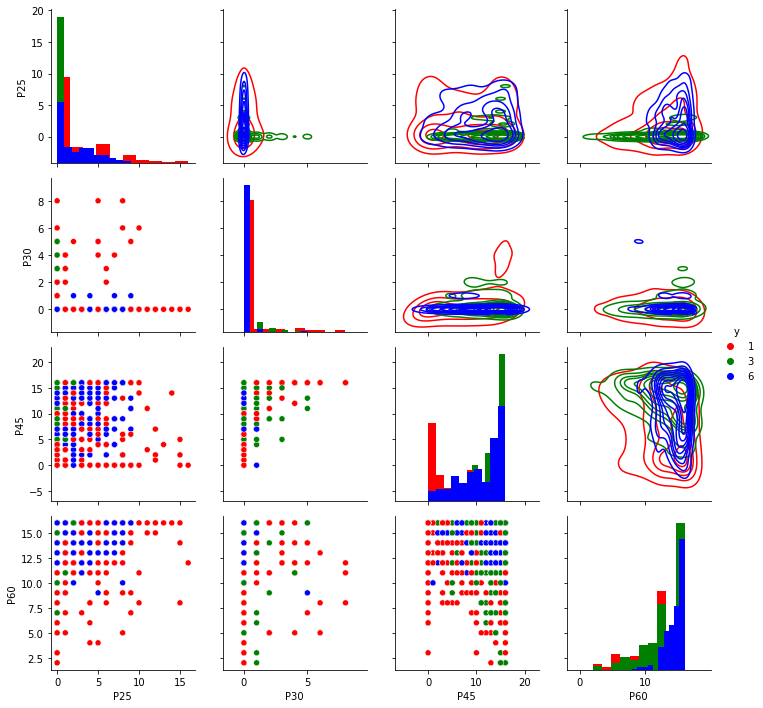

In [7]:
#using seaborn to explore the sepreation in our data set.I'll be selecting a few  coloums for it
g = sns.PairGrid(
        trn,
        vars = ["P25", "P30","P45","P60"],
        hue = "y",
        diag_sharey = False,
        palette = ["red","green","blue"]
)

g.map_diag(plt.hist)

g.map_upper(sns.kdeplot)

g.map_lower(sns.scatterplot)

g.add_legend()

In [8]:
# As you can see there is a clear seperation in the 3 types of digits

In [9]:
df.to_csv("datasets/optdigits.csv",sep=",",index = False)
trn.to_csv("datasets/optdigits_trn.csv",sep=",",index = False)
tst.to_csv("datasets/optdigits_tst.csv",sep=",",index = False)